# Laboratorio No. 3
- Ricardo Méndez 21289
- Sara Echeverría 21371
- Francisco Castillo 21562

Enlace al repositorio: [https://github.com/FranzCastillo/IA-Perceptron-Feature-Gradient](https://github.com/FranzCastillo/IA-Perceptron-Feature-Gradient)

# Task No. 1 Preguntas teóricas

### 1.1 Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

### 1.2 Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

## Feature extraction
Este implica transformar las características originales en un conjunto más informativo y compacto. 

## Feature selection
Este consiste en elegir un subconjunto relevante de características originales para mejorar el rendimiento del modelo.

### 1.3 Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

Un perceptrón de una sola capa es, como indican las instrucciones, un tipo de red neuronal simple; este solo puede aprender funciones lineales separables. Es conformado por una capa de entrada, una capa de procesamiento y una función de activación. El proceso de aprendizaje consiste en "alimentar" al perceptrón con varias observaciones, calcular la salida de cada una y ajustar los pesos para minimizar el error de salida.

La manera en la que actualiza sus parámetros es a través de la regla de aprendizaje, la cual se basa en el error de salida. Si el error es positivo, se aumenta el peso; si el error es negativo, se disminuye el peso. Este proceso se repite hasta que el error sea mínimo.

**Referencias**
[Perceptrón: ¿qué es y para qué sirve?](https://datascientest.com/es/perceptron-que-es-y-para-que-sirve)

# Task No. 2.1 Gradiente descendiente estocástico

# Task No. 2.2 Feature selection

# Task No. 2.3 Perceptrón

In [1]:
# Load Iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def unit_step(x):
    """ Heaviside Step function. v must be a scalar or a numpy array. """
    threshold = 0
    versicolor = 0
    virginica = 1
    return np.where(x > threshold, virginica, versicolor)

In [3]:
class Perceptron:
    """
    Perceptron classifier.
    Reference: https://www.youtube.com/watch?v=aOEoxyA4uXU
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.random.rand(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.learning_rate * (y[i] - y_predicted)
                self.weights += update * x_i
                self.bias += update
        
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [4]:
iris = load_iris()
print(iris.keys())

# Print the names of the four features and the values
print(iris.feature_names)

# Print the names of the three target classes 
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
X = iris.data
y = iris.target

# Drop setosa
X = X[y != 0]
y = y[y != 0]

# Keep sepal length and sepal width as the features in the X matrix
X_sepal_length = X[:, 0]
X_sepal_width = X[:, 1]

X = np.array(list(zip(X_sepal_length, X_sepal_width)))

# Binarize the target
y = np.where(y == 1, 0, 1) # Versicolor is 0, Virginica is 1

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21562)

In [7]:
# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

In [8]:
# Make predictions
y_pred = perceptron.predict(X_test)

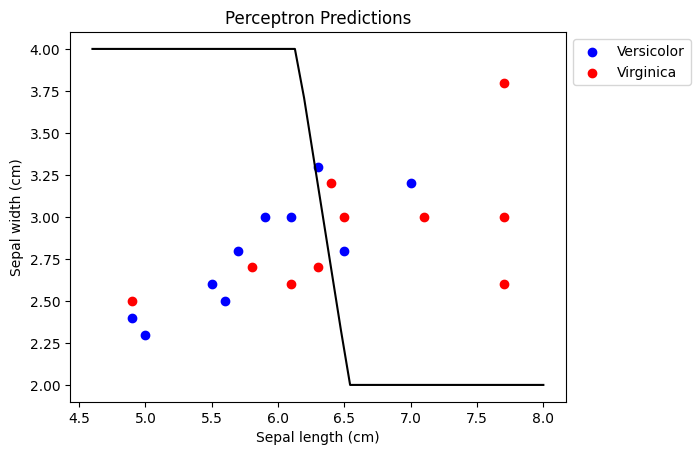

In [9]:
# Plot the decision boundary
x1 = np.linspace(4.6, 8, 50)
x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

# Limit the decision boundary to the range of the sepal width
x2 = np.clip(x2, 2, 4)
plt.plot(x1, x2, 'k')

# Plot predictions
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', label='Versicolor')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', label='Virginica')


plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Perceptron Predictions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[7, 3],
       [4, 6]], dtype=int64)

In [11]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20


In [12]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.65


Se ha escogido para evaluar el perceptrón el _accuracy_ debido a que es un problema de clasificación binaria. El _accuracy_ es una métrica adecuada para evaluar la precisión de un modelo en donde es necesario tener en cuenta tanto los verdaderos positivos como los verdaderos negativos. 

En este caso, el _accuracy_ obtenido es de 0.65. No es un valor ideal, pero es un buen punto de partida para mejorar el modelo. Al haber tomado solamente 2 _features_ de los disponibles en el conjunto de datos, es posible que el modelo no esté capturando toda la información necesaria para hacer predicciones más precisas. Además, es necesario tomar en cuenta que las que han sido escogidas (Sepal width y Sepal length) no son las que mejor separan las clases, pues se pueden observar puntos de una clase en el área de la otra. 